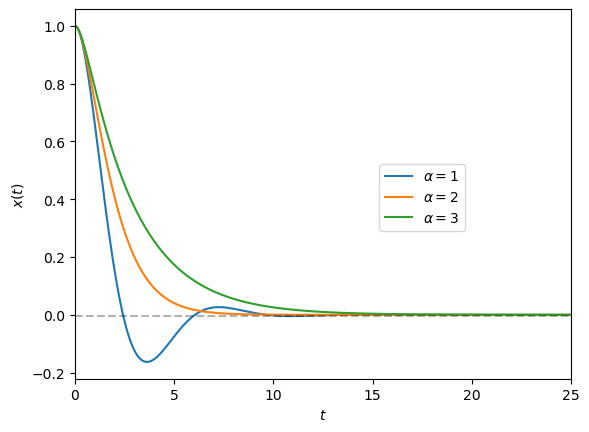

In [1]:
### 2c

from sympy import *
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy.linalg import eig

def ode(t, x):
    dxdt = [x[1], - x[0] - a * x[1]]
    return dxdt 

a_values = [1,2,3]
tstart = 0
tstop = 50
x0 = [1, 0]

sols = []

for a in a_values:
    sols.append(solve_ivp(ode, [tstart, tstop], x0, max_step=0.01))
axes = plt.axes()
plt.plot(sols[0].t, sols[0].y[0], label=f'$\\alpha={a_values[0]}$')
plt.plot(sols[1].t, sols[1].y[0], label=f'$\\alpha={a_values[1]}$')
plt.plot(sols[2].t, sols[2].y[0], label=f'$\\alpha={a_values[2]}$')
axes.axhline(-0.0024, color = 'black', alpha = 0.3, linestyle = '--')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.ticklabel_format(style='plain')
plt.xlim(0, 25)
plt.legend()
axes.legend(bbox_to_anchor=(0.8,0.6))
plt.show()

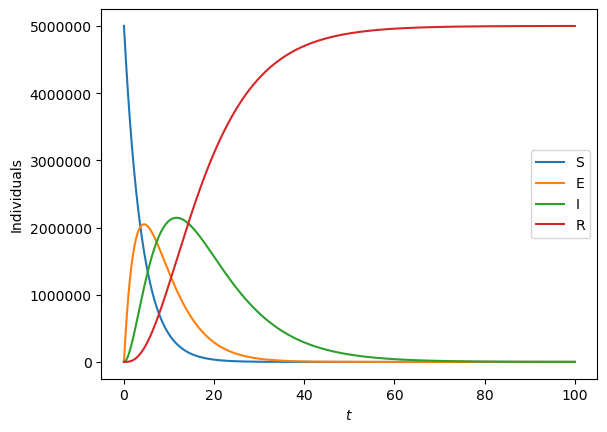

In [2]:
### 3ai

def ode(t, x):
    dxdt = [-lam*x[0], lam*x[0]-gam*x[1], gam*x[1]-mu*x[2], mu*x[2]]
    return dxdt 

lam, gam, mu = 0.25, 0.2, 0.1
tstart = 0
tstop = 100
x0 = [5e6, 100, 0, 0]

sol = solve_ivp(ode, [tstart, tstop], x0, max_step=0.01)
plt.plot(sol.t, sol.y[0], label='S')
plt.plot(sol.t, sol.y[1], label='E')
plt.plot(sol.t, sol.y[2], label='I')
plt.plot(sol.t, sol.y[3], label='R')
plt.xlabel('$t$')
plt.ylabel('Individuals')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

In [3]:
### 3aii

lam, gam, mu = 0.25, 0.2, 0.1

A = np.array([[-lam, 0, 0, 0], 
              [lam, -gam, 0, 0],
              [0, gam, -mu, 0],
              [0, 0, mu, 0]])

evalues, evectors = eig(A)

P  = evectors
D  = lambda t : np.array([[np.exp(t*evalues[0]), 0],
                         [0, np.exp(t*evalues[1])]])

t_values = [0, 100, 0.1]
    
x0 = np.array([5e6, 100, 0, 0])

print(evalues, '\n')
print(evectors)
    
    

[ 0.   -0.1  -0.2  -0.25] 

[[ 0.          0.          0.          0.11355167]
 [ 0.          0.          0.40824829 -0.56775837]
 [ 0.          0.70710678 -0.81649658  0.75701116]
 [ 1.         -0.70710678  0.40824829 -0.30280447]]


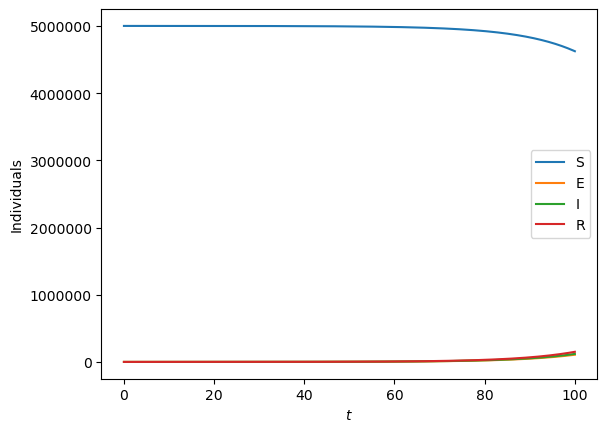

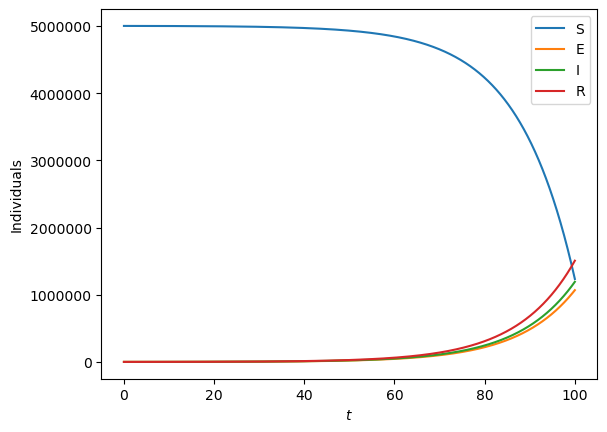

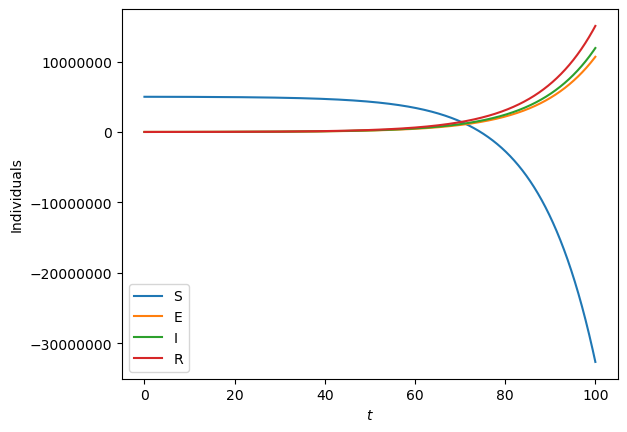

In [4]:
### 3bi

def ode(t, x):
    dxdt = [-lam*x[2], lam*x[2]-gam*x[1], gam*x[1]-mu*x[2], mu*x[2]]
    return dxdt 

lam, gam, mu = 0.25, 0.2, 0.1
tstart = 0
tstop = 100
Es = [100, 1000, 10000]

for E in Es:
    x0 = [5e6, E, 0, 0]
    sol = solve_ivp(ode, [tstart, tstop], x0, max_step=0.01)
    plt.plot(sol.t, sol.y[0], label='S')
    plt.plot(sol.t, sol.y[1], label='E')
    plt.plot(sol.t, sol.y[2], label='I')
    plt.plot(sol.t, sol.y[3], label='R')
    plt.xlabel('$t$')
    plt.ylabel('Individuals')
    plt.ticklabel_format(style='plain')
    plt.legend()
    plt.show()

In [5]:
### 3bii

lam, gam, mu = 0.25, 0.2, 0.1

A = np.array([[0, 0, -lam, 0], 
              [0, -gam, lam, 0],
              [0, gam, -mu, 0],
              [0, 0, mu, 0]])

evalues, evectors = eig(A)

P  = evectors
D  = lambda t : np.array([[np.exp(t*evalues[0]), 0],
                         [0, np.exp(t*evalues[1])]])

t_values = [0, 100, 0.1]
    
x0 = np.array([5e6, 100, 0, 0])

print(evalues, '\n')
print(evectors)

[ 0.          0.          0.07912878 -0.37912878] 

[[ 1.          0.         -0.86369264 -0.35489891]
 [ 0.          0.          0.24484379  0.75114892]
 [ 0.          0.          0.2733718  -0.53820957]
 [ 0.          1.          0.34547706  0.14195956]]


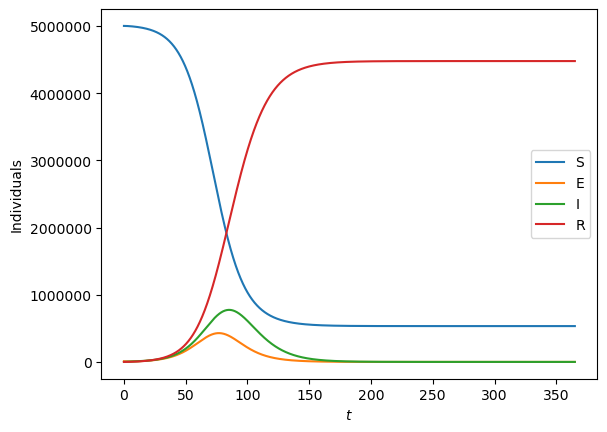

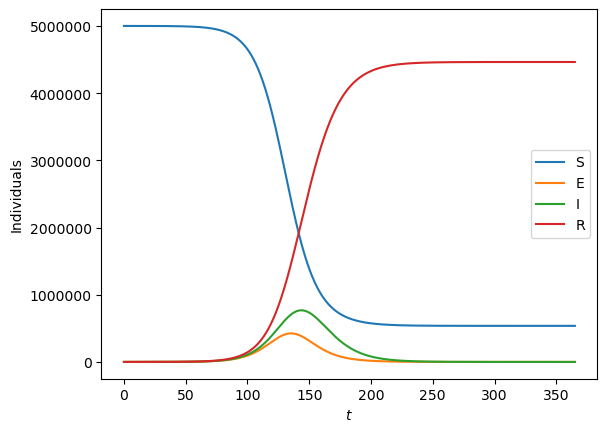

In [6]:
### 3ci

def ode(t, x):
    dxdt = [-lam*x[2]*x[0]/5e6, lam*x[2]*x[0]/5e6-gam*x[1], gam*x[1]-mu*x[2], mu*x[2]]
    return dxdt 

lam, gam, mu = 0.25, 0.2, 0.1
tstart = 0
tstop = 365
Es = [1e4, 100]

for E in Es:
    x0 = [5e6, E, 0, 0]
    sol = solve_ivp(ode, [tstart, tstop], x0, max_step=0.01)
    plt.plot(sol.t, sol.y[0], label='S')
    plt.plot(sol.t, sol.y[1], label='E')
    plt.plot(sol.t, sol.y[2], label='I')
    plt.plot(sol.t, sol.y[3], label='R')
    plt.xlabel('$t$')
    plt.ylabel('Individuals')
    plt.ticklabel_format(style='plain')
    plt.legend()
    plt.show()

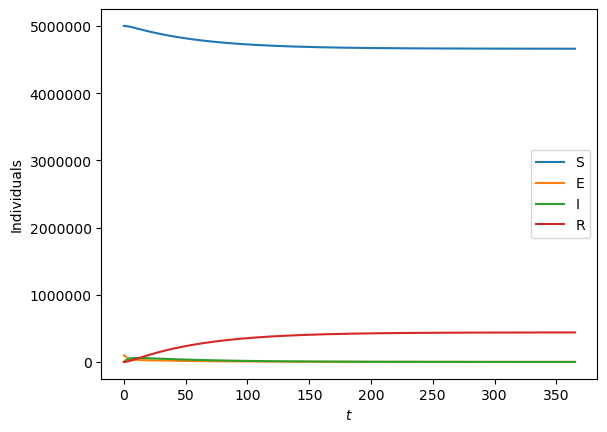

In [8]:
### 3ciii

def ode(t, x):
    dxdt = [-lam*x[2]*x[0]/5e6, lam*x[2]*x[0]/5e6-gam*x[1], gam*x[1]-mu*x[2], mu*x[2]]
    return dxdt 

lam, gam, mu = 0.08, 0.2, 0.1
tstart = 0
tstop = 365
x0 = [5e6, 1e5, 0, 0]
sol = solve_ivp(ode, [tstart, tstop], x0, max_step=0.01)
plt.plot(sol.t, sol.y[0], label='S')
plt.plot(sol.t, sol.y[1], label='E')
plt.plot(sol.t, sol.y[2], label='I')
plt.plot(sol.t, sol.y[3], label='R')
plt.xlabel('$t$')
plt.ylabel('Individuals')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()